In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression


In [2]:
# read in dataset
df = pd.read_csv('US_Accidents_Dec19.csv')

In [3]:
# form dataframe with relevant variables
data =  df[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Wind_Chill(F)' ]]

In [4]:
# rename columns
data.columns = ['Temperature', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed', 'Precipitation', 'Wind_Chill' ]

In [5]:
# Count number of nulls
n = pd.DataFrame(data.isnull().sum())
n.columns=['Number of Missing Values']
n

,Number of Missing Values
Temperature,56063
Humidity,59173
Pressure,48142
Visibility,65691
Wind_Speed,440840
Precipitation,1998358
Wind_Chill,1852623


In [6]:
# Count number of non-nulls
n2 = pd.DataFrame(data.notnull().sum())
n2.columns=['Number of Notnull']
n2

,Number of Notnull
Temperature,2918272
Humidity,2915162
Pressure,2926193
Visibility,2908644
Wind_Speed,2533495
Precipitation,975977
Wind_Chill,1121712


In [7]:
feature_names = ['Temperature', 'Humidity', 'Wind_Speed']
target_name = 'Wind_Chill'

In [8]:
# drop all rows with missing data, and select features and target for model
data_sub =  pd.concat([data[feature_names], data[target_name]], axis=1).dropna()
data_sub.describe()

,Temperature,Humidity,Wind_Speed,Wind_Chill
count,1.120446e+06,1.120446e+06,1.120446e+06,1.120446e+06
mean,5.432662e+01,6.639477e+01,7.842217e+00,5.133033e+01
std,2.172911e+01,2.186651e+01,5.354729e+00,2.519188e+01
min,-2.900000e+01,1.000000e+00,0.000000e+00,-5.900000e+01
25%,3.740000e+01,5.100000e+01,4.600000e+00,3.200000e+01
50%,5.400000e+01,6.900000e+01,7.000000e+00,5.400000e+01
75%,7.300000e+01,8.500000e+01,1.040000e+01,7.300000e+01
max,1.150000e+02,1.000000e+02,2.550000e+02,1.150000e+02


In [9]:
# feature and target names as variables

X = data_sub[feature_names]              
y = data_sub[target_name]                


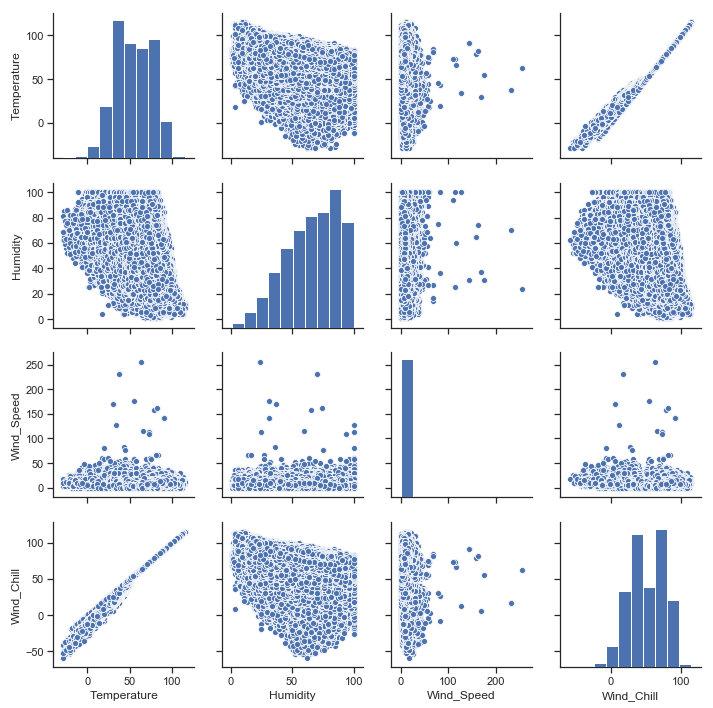

In [226]:
# pairplot target and features
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_sub)

In [10]:
# split into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [11]:
# fit data and show score

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.9936506482583974

In [16]:
print('Coefficients: \n', lr.coef_) 

Coefficients: 
 [ 1.14924003  0.01481273 -0.28167724]


In [17]:
print('Intercepts: \n', lr.intercept_) 

Intercepts: 
 -9.87816626635275


In [18]:
print('Variance score: {}'.format(lr.score(X_test, y_test))) 

Variance score: 0.9936506482583974


In [19]:
np.std(lr.predict(X))

25.113867762805473

In [20]:
np.median(lr.predict(X))

51.00208297441607

In [21]:
np.max(lr.predict(X))

120.17914659032893

In [22]:
np.mean(lr.predict(X))

51.330669081677215

In [23]:
np.min(lr.predict(X))

-47.47059935064839

In [24]:
np.min(y)

-59.0

In [25]:
# R2 calculation
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(X))
r2

0.9936758853671162

In [26]:
lr.predict(X).shape

(1120446,)

In [27]:
# Adjusted R2 calculation
n = lr.predict(X).shape[0]
p = 3
adjr2 = 1 - (1 - r2)* (n - 1)/ (n - p -1)
adjr2

0.9936758684342059

In [28]:
# calculate rmse:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(data_sub[target_name], lr.predict(X)))

print(rmse)

2.003366040515391


In [29]:
# calculate mae:
mae = (metrics.mean_absolute_error(data_sub[target_name], lr.predict(X)))
mae

1.530242369644165

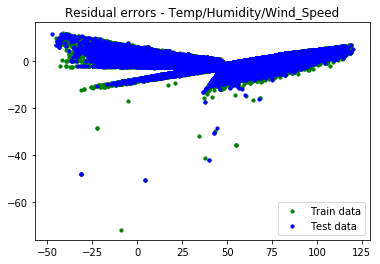

In [32]:
## setting plot style 
#plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
## plotting residual errors in test data 
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 

## plotting legend 
plt.legend(loc = 'lower right') 
  
## plot title 
plt.title("Residual errors - Temp/Humidity/Wind_Speed") 
  
## function to show plot 
plt.show() 

In [244]:
# calculate residuals
resids = y - lr.predict(X)
#plt.hist(resids)
#plt.hist(np.log(resids))
print(resids.describe().round(3),  # residuals stats
      pd.DataFrame(lr.predict(X)).describe().round(3),sep='\n\n') # predicted Wind_Chill stats

count    1120446.000
mean          -0.000
std            2.003
min          -12.201
25%           -1.266
50%           -0.104
75%            1.187
max           71.948
Name: Wind_Chill, dtype: float64

                 0
count  1120446.000
mean        51.331
std         25.114
min        -47.471
25%         31.753
50%         51.002
75%         72.578
max        120.179


In [40]:
data_sub.tail(4)

,Temperature,Humidity,Wind_Speed,Wind_Chill
2974331,70.0,73.0,6.0,70.0
2974332,73.0,64.0,10.0,73.0
2974333,71.0,81.0,8.0,71.0
2974334,79.0,47.0,7.0,79.0


In [31]:
lr.predict([[70, 73, 6]])   # test prediction 1

array([69.95990142])

In [30]:
data_sub[999995:999999]

,Temperature,Humidity,Wind_Speed,Wind_Chill
2667493,6.1,73.0,11.5,-9.5
2667494,6.1,73.0,11.5,-9.5
2667495,8.2,82.0,4.6,-0.3
2667496,-0.9,75.0,11.5,-18.3


In [31]:
lr.predict([[-9, 75, 11.5]]) # test prediction 2

array([-22.34966035])

In [33]:
from sklearn.feature_selection import f_regression   # calculate f-statisics and p-values

In [34]:
f_regression(X,y)  # 1st array f-statistics, 2nd array p-values

(array([1.08380868e+08, 1.17459206e+05, 4.30830143e+04]), array([0., 0., 0.]))

In [35]:
p_values = f_regression(X,y)[1]
p_values.round(5)

array([0., 0., 0.])

In [36]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
# Building same model using ols
m = ols('Wind_Chill ~ Temperature + Humidity+ Wind_Speed',data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             Wind_Chill   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 5.868e+07
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:19:24   Log-Likelihood:            -2.3684e+06
No. Observations:             1120446   AIC:                         4.737e+06
Df Residuals:                 1120442   BIC:                         4.737e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.8876      0.010   -941.943      

In [38]:
np.max(m.fittedvalues)

58.42609249705577

# Summary:

Examining the null data, shows precipitation with the maximum number of missing values 1998358, non-missing values are 975977.<br>

A combination of the 6 numerical features available were tested to predict Wind_Chill. Six of these unique models are listed in the table below. Both sklearn(in black) and OLS(in red) were tried for various models. The best results, in terms of minimum MAE and RMSE, were observed by including Temperature/Humidity and Wind_Speed only, in the model.
The coefficients and intercept are shown in the table.


		
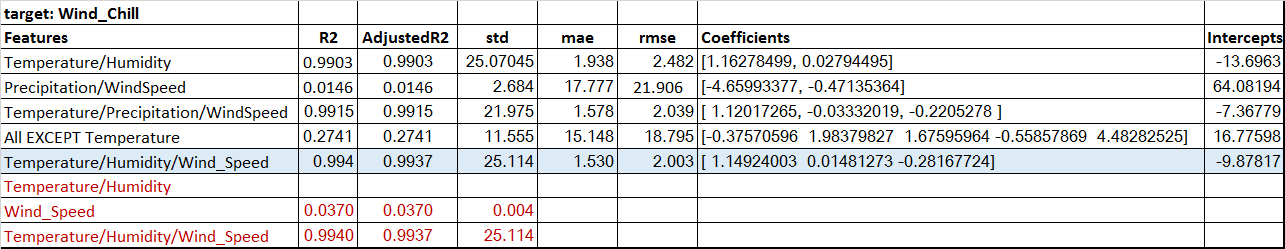

| target: Wind_Chill                  |             |             |             |        |        |                                                               |              |
|-------------------------------------|-------------|-------------|-------------|--------|--------|---------------------------------------------------------------|--------------|
| Features                            | R2          | AdjustedR2  | std         | mae    | rmse   | Coefficients                                                  | Intercepts   |
| Temperature/Humidity                | 0.9903      | 0.9903      | 25.07045246 | 1.938  | 2.482  | [1.16278499, 0.02794495]                                      | -13.69628535 |
| Precipitation/WindSpeed             | 0.0146      | 0.0146      | 2.684       | 17.777 | 21.906 | [-4.65993377, -0.47135364]                                    | 64.08194     |
| Temperature/Precipitation/WindSpeed | 0.9915      | 0.9915      | 21.975      | 1.578  | 2.039  | [ 1.12017265, -0.03332019, -0.2205278 ]                       | -7.367791671 |
| All EXCEPT Temperature              | 0.2741      | 0.2741      | 11.555      | 15.148 | 18.795 | [-0.37570596  1.98379827  1.67595964 -0.55857869  4.48282525] | 16.77598176  |
| Temperature/Humidity/Wind_Speed     | 0.993675885 | 0.9937      | 25.114      | 1.530  | 2.003  | [ 1.14924003  0.01481273 -0.28167724]                         | -9.878166266 |
| Temperature/Humidity                |             |             |             |        |        |                                                               |              |
| Wind_Speed                          | 0.0370      | 0.0370      | 0.004       |        |        |                                                               |              |
| Temperature/Humidity/Wind_Speed     | 0.9940      | 0.9937      | 25.114      |        |        |                                                               |              |